# <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:200%; text-align:center; border-radius:10px 10px;">KNN Classification Project: The Sonar Data (Rock or Mine)</p>


<div class="alert alert-block alert-success">
    
## <span style=" color:#eb346e">The Sonar Data 

### Detecting a Rock or a Mine

Sonar (sound navigation ranging) is a technique that uses sound propagation (usually underwater, as in submarine navigation) to navigate, communicate with or detect objects on or under the surface of the water, such as other vessels.

The data set contains the response metrics for 60 separate sonar frequencies sent out against a known mine field (and known rocks). These frequencies are then labeled with the known object they were beaming the sound at (either a rock (R) or a mine (M)). 

Main goal in this project is to create a machine learning model capable of detecting the difference between a rock or a mine based on the response of the 60 separate sonar frequencies.

Data Source: https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)
</span>

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Exploratory Data Analysis

**Read the data**

In [2]:
df = pd.read_csv('sonar.all-data.csv')

In [3]:
df.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Freq_1   208 non-null    float64
 1   Freq_2   208 non-null    float64
 2   Freq_3   208 non-null    float64
 3   Freq_4   208 non-null    float64
 4   Freq_5   208 non-null    float64
 5   Freq_6   208 non-null    float64
 6   Freq_7   208 non-null    float64
 7   Freq_8   208 non-null    float64
 8   Freq_9   208 non-null    float64
 9   Freq_10  208 non-null    float64
 10  Freq_11  208 non-null    float64
 11  Freq_12  208 non-null    float64
 12  Freq_13  208 non-null    float64
 13  Freq_14  208 non-null    float64
 14  Freq_15  208 non-null    float64
 15  Freq_16  208 non-null    float64
 16  Freq_17  208 non-null    float64
 17  Freq_18  208 non-null    float64
 18  Freq_19  208 non-null    float64
 19  Freq_20  208 non-null    float64
 20  Freq_21  208 non-null    float64
 21  Freq_22  208 non

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Freq_1,208.0,0.029164,0.022991,0.0015,0.013350,0.02280,0.035550,0.1371
Freq_2,208.0,0.038437,0.032960,0.0006,0.016450,0.03080,0.047950,0.2339
Freq_3,208.0,0.043832,0.038428,0.0015,0.018950,0.03430,0.057950,0.3059
Freq_4,208.0,0.053892,0.046528,0.0058,0.024375,0.04405,0.064500,0.4264
Freq_5,208.0,0.075202,0.055552,0.0067,0.038050,0.06250,0.100275,0.4010
Freq_6,208.0,0.104570,0.059105,0.0102,0.067025,0.09215,0.134125,0.3823
Freq_7,208.0,0.121747,0.061788,0.0033,0.080900,0.10695,0.154000,0.3729
Freq_8,208.0,0.134799,0.085152,0.0055,0.080425,0.11210,0.169600,0.4590
Freq_9,208.0,0.178003,0.118387,0.0075,0.097025,0.15225,0.233425,0.6828
Freq_10,208.0,0.208259,0.134416,0.0113,0.111275,0.18240,0.268700,0.7106


**Create a heatmap of the correlation between the difference frequency responses.**

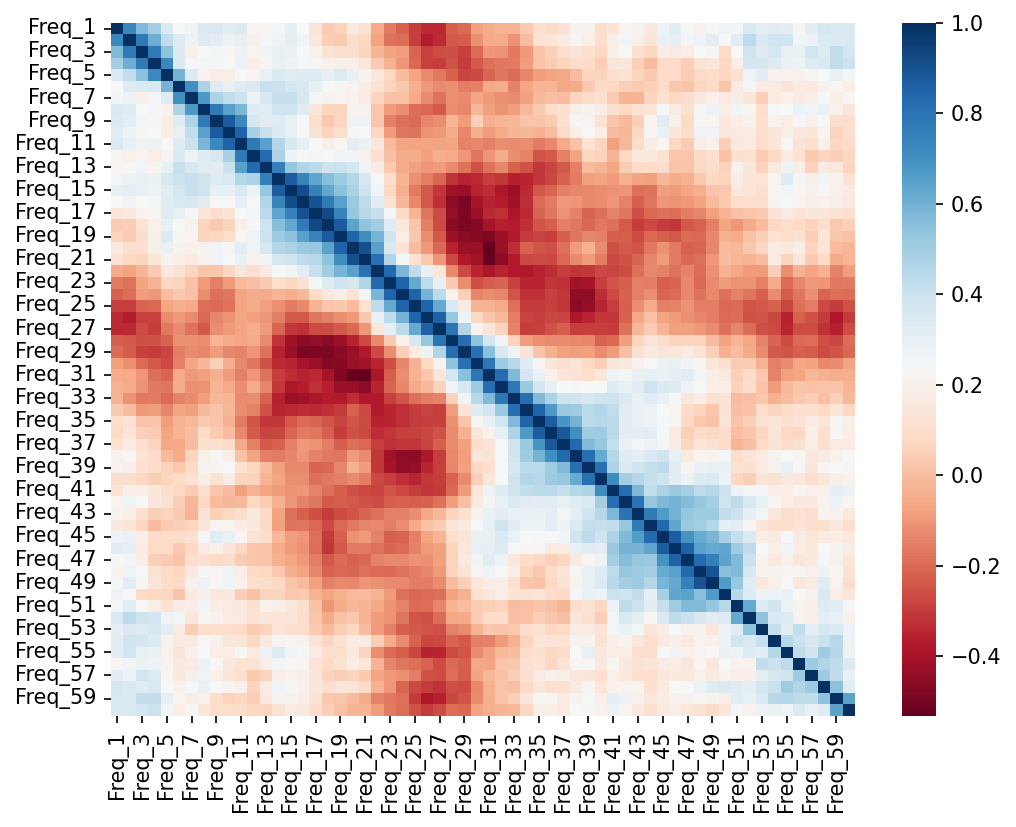

In [6]:
plt.figure(figsize=(8,6), dpi=150)
sns.heatmap(df.corr(numeric_only=True), cmap="RdBu");

**What are the top 5 correlated frequencies with the target label?**

* Note: We're looking for **absolute** correlation values.

In [7]:
# Use map to convert label categories to 0 and 1
df["Target"] = df["Label"].map({"R":0,"M":1})

In [8]:
# Check the converted column and its values
df.head()

# The Label columnn was not removed, isntead a new column created as Target

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label,Target
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R,0
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R,0
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R,0
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R,0
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R,0


In [9]:
# We are looking for absolute values before sorting

np.abs(df.corr(numeric_only=True)["Target"]).sort_values().tail(6)

# Since the most correlated one is Target itself, I displayed 6 of them to see the most correlated 5

Freq_45    0.339406
Freq_10    0.341142
Freq_49    0.351312
Freq_12    0.392245
Freq_11    0.432855
Target     1.000000
Name: Target, dtype: float64

## Train | Test Split

Our approach here will be one of using Cross Validation on 90% of the dataset, and then evaluating our results on a final test set of 10%.

**Split the data as X and y and then split them into a training set and test set, with 90% for Cross-Validation training, and 10% for a final test set.**

*test_size=0.1*, *random_state=42*

In [10]:
from sklearn.model_selection import train_test_split 

In [11]:
X = df.drop(['Target','Label'],axis=1) # there are two terget columns; so we can drop them
y = df['Label']  # original label column (I created T)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

**Create a PipeLine that contains both a StandardScaler and a KNN model**

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [14]:
scaler = StandardScaler()

In [15]:
knn = KNeighborsClassifier()

In [16]:
operations = [('scaler',scaler),('knn',knn)]

In [17]:
from sklearn.pipeline import Pipeline

In [18]:
pipe = Pipeline(operations)

**Perform a grid-search with the pipeline to test various values of k and report back the best performing parameters.**

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
k_values = list(range(1,30))

In [21]:
param_grid = {'knn__n_neighbors': k_values}

In [22]:
full_cv_classifier = GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')

In [23]:
full_cv_classifier.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

In [24]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=1))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 1,
 'knn__p': 2,
 'knn__weights': 'uniform'}

The model chose K as 1 ('knn__n_neighbors'= 1).

**Using the .cv_results_ dictionary, see if you can create a plot of the mean test scores per K value.**

In [25]:
full_cv_classifier.cv_results_['mean_test_score']

array([0.84537696, 0.78065434, 0.77524893, 0.75917496, 0.75931721,
       0.74822191, 0.75945946, 0.71664296, 0.7113798 , 0.68421053,
       0.70042674, 0.68435277, 0.68449502, 0.67908962, 0.69530583,
       0.68990043, 0.7113798 , 0.70042674, 0.72204836, 0.67908962,
       0.70071124, 0.69530583, 0.69530583, 0.68463727, 0.68477952,
       0.67923186, 0.67411095, 0.65775249, 0.6685633 ])

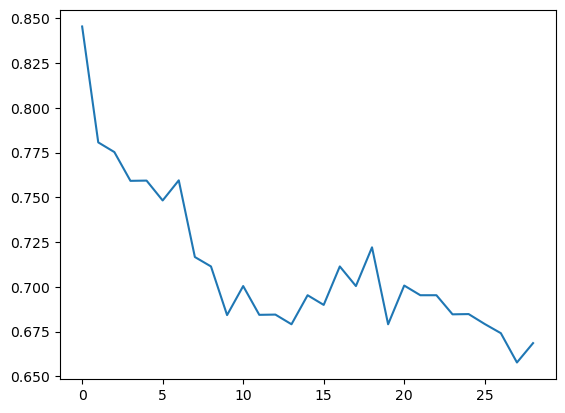

In [26]:
# Plot it 

pd.DataFrame(full_cv_classifier.cv_results_)['mean_test_score'].plot();

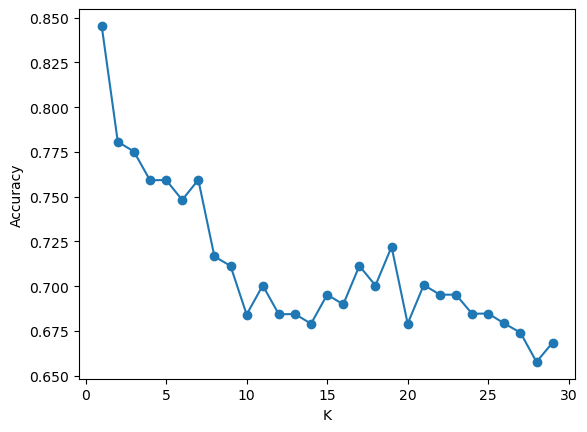

In [27]:
# Or we can plot it as follows

scores = full_cv_classifier.cv_results_['mean_test_score']
plt.plot(k_values,scores,'o-')
plt.xlabel("K")
plt.ylabel("Accuracy");

## Final Model Evaluation

**Using the grid classifier object from the previous step, get a final performance classification report and confusion matrix.**

In [28]:
pred = full_cv_classifier.predict(X_test)

In [29]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [30]:
# Accuracy Score
accuracy_score(y_test,pred)

0.9047619047619048

In [31]:
# Confusion Matrix
confusion_matrix(y_test,pred)

array([[12,  1],
       [ 1,  7]], dtype=int64)

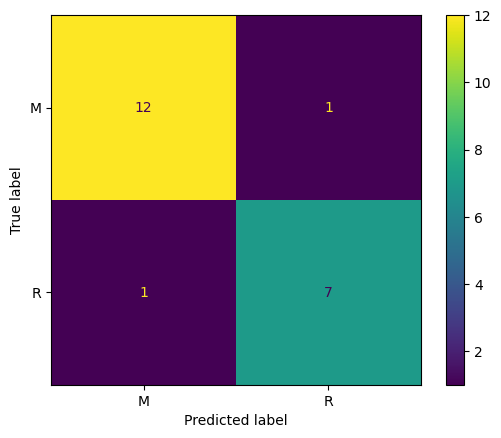

In [34]:
# Plot the Confusion Matrix

from sklearn.metrics import ConfusionMatrixDisplay 
ConfusionMatrixDisplay.from_predictions(y_test, pred);

In [32]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           M       0.92      0.92      0.92        13
           R       0.88      0.88      0.88         8

    accuracy                           0.90        21
   macro avg       0.90      0.90      0.90        21
weighted avg       0.90      0.90      0.90        21

